In [2]:
#@title 


%%HTML
<div style="text-align:center; display:flex; justify-content:space-between;">
<div style="width:25%; height:150px; display: flex;">

<img src="https://giecaruff.github.io/sites/gss_semana_2020/logos/GSS_semana_geofisica.png" height="40%">

</div>
<div style="width:50%; height:150px; text-align:center;">

<br><br>

<span style="color:purple; font-size: 16pt;">Minicurso Python para Geofísicos <br></span>
<span style="color:purple; font-size: 25pt;font-weight: bold;"> Poço Sintético </span>

</div>

<div style="width:25%; height:150px; text-align:right">
<img src="https://giecaruff.github.io/sites/gss_semana_2020/logos/logo_colorida_icone.png" height="60%">
</div>
</div>

<div>
<center> <span style="color:purple; font-size: 25pt;font-weight: bold;center">Equipe:</span>
<br><br>

<div style="width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Fernando Vizeu</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/vizeu.jfif" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">fernandovizeu@id.uff.br</span> </div>
<div style="width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Mário Martins</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/mario_machine.png" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">mario_martins@id.uff.br</span> </div>
<div style="width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Rodrigo Mota</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/rodrigo_dutra.jfif" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">dutrarodrigo@id.uff.br</span> </div>
<div style="white;width:172px;text-align:center;display:inline-block;"> <span style="color:#92d14f; font-size: 14pt;font-weight: bold;">Rodrigo Bijani</span> <div><img src="https://giecaruff.github.io/sites/gss_semana_2020/integrantes/rodrigo_bijani.jfif" width="150px" style="border-radius:50%;border-style: solid;"></div> <span style="color:#3991c9; font-size: 10pt">rodrigobijani@id.uff.br</span> </div>

</div>



# Referências:

[seg - tutorials (2014) - how_to_make_synthetic](https://github.com/seg/tutorials-2014/blob/master/1406_Make_a_synthetic/how_to_make_synthetic.ipynb)

[GIECAR - Modelagem Sísmica de Propriedades de Rocha](https://www.youtube.com/watch?v=p2EAf3H4Ec0&list=PL-QDjrxb17QNBRUUR3_xU1XI28Ts8QGlK)



#### Este Script tem por objetivo simular um traço sísmico 1D utilizando dados de poço. Essa modelagem é importante para relacionar dados sísmicos e dados de poços, o que permite um melhor entendimento do comportamento da sísmica em subsuperfície.

#### 1 - Instalando as bibliotecas necessárias e criando um reposítório local dentro do colaboratory com o arquivo dp1.las.


In [3]:
# instalando localmente a biblioteca "lasio" para ler arquivos .las
!pip install lasio
# criando um diretório local denominado "dados"
!mkdir -p dados
# importando o arquivo "dp1.las" dentro do diretório "dados" criado
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1RDzRO2ADkuXEdoVZqA8KVTQ9IzrI6bVD' -O dados/dp1.las

--2020-09-09 23:34:04--  https://docs.google.com/uc?export=download&id=1RDzRO2ADkuXEdoVZqA8KVTQ9IzrI6bVD
Resolving docs.google.com (docs.google.com)... 172.217.204.113, 172.217.204.102, 172.217.204.138, ...
Connecting to docs.google.com (docs.google.com)|172.217.204.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-bs-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/77auoc6f0mtn9eebbn4qlv48v53o3t25/1599694425000/08383065786090340556/*/1RDzRO2ADkuXEdoVZqA8KVTQ9IzrI6bVD?e=download [following]
--2020-09-09 23:34:05--  https://doc-0g-bs-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/77auoc6f0mtn9eebbn4qlv48v53o3t25/1599694425000/08383065786090340556/*/1RDzRO2ADkuXEdoVZqA8KVTQ9IzrI6bVD?e=download
Resolving doc-0g-bs-docs.googleusercontent.com (doc-0g-bs-docs.googleusercontent.com)... 173.194.216.132, 2607:f8b0:400c:c12::84
Connecting to doc-0g-bs-docs.googleusercontent.com (doc-0g

### Você deve ver algo assim:

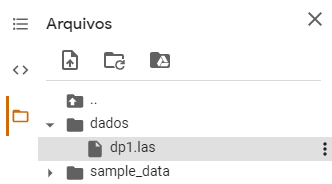

In [4]:
## importando as bibliotecas

# https://github.com/seg/tutorials-2014/blob/master/1406_Make_a_synthetic/how_to_make_synthetic.ipynb

import lasio # leitor de arquivos .las
import numpy as np # biblioteca numérica do python
import matplotlib.pyplot as plt # biblioteca gráfica do python

# ---------------------------------------------------------------------------- #

def grafico_automatico(dicionario, dados, tamanho = [12,11]):

    chaves = []
    for i in dicionario:
        if i != 'profundidade':
            chaves.append(i)

    n_tracks = np.max(chaves) + 1

    profundidade_dado = dados[dicionario['profundidade']['perfil']]
    profundidade_descricao = dicionario['profundidade']['descricao']

    # n_tracks = número máximo encontrado nas chaves do dicionário

    fig, ax = plt.subplots(1,n_tracks)
    # similar a "fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4)", onde o elemento ax receberá todos os valores
    # logo, ax1 = ax[0], ax2 = ax[1], e assim por diante

    fig.set_size_inches(tamanho) # tamanho da figura | polegadas

    ax[0].set_ylabel( profundidade_descricao , fontsize=16)  # label y para a profundidade aplicada apenas no primeiro track
    for i in dicionario: # loop
        if i != 'profundidade':
            for j in range(len(dicionario[i]['perfis'])): # pode ter mais de um perfil em cada track, estes são gerenciados pelo índice "j"
                ax[i].plot(dados[dicionario[i]['perfis'][j]], # "i" são as demais curvas distintas de zero "if i != 0:"
                             profundidade_dado,
                             dicionario[i]['estilo'][j], # estilo de linha, pode ser "." ou "-", "--"
                             color = dicionario[i]['cores'][j], # a cor da linha que você quer
                             linewidth = 1, # o comprimento da linha é fixo em 1, mas você pode alterar se quiser
                             label=dicionario[i]['perfis'][j]) # 
                
            if i > 0:
                ax[i].set_yticklabels([]) # faz com que o valor da profundidade não aparece nos tracks além de "ax[0]""

            ax[i].invert_yaxis()
            ax[i].grid()
            ax[i].legend(loc=2)
            ax[i].set_xlabel(dicionario[i]['unidade']) # adiciona a unidade do perfil

    plt.show()

# ---------------------------------------------------------------------------- #

poco = lasio.read('dados/dp1.las') # lê o arquivo .las
print("perfis", poco.keys() ) # printa os perfis existentes ex: perfis ['DEPT', 'SP', ... , etc]

#DP1.well.NULL.value = -999.0
poco.sections['Well']

perfis ['DEPT', 'SP', 'ILD', 'ILM', 'LL8', 'GR', 'CALI', 'DRHO', 'RHOB', 'NPHI', 'DT']


[HeaderItem(mnemonic="STRT", unit="F", value="100.0", descr="START DEPTH"),
 HeaderItem(mnemonic="STOP", unit="F", value="7938.0", descr="STOP DEPTH"),
 HeaderItem(mnemonic="STEP", unit="F", value="0.5", descr="STEP VALUE"),
 HeaderItem(mnemonic="NULL", unit="", value="-999.25", descr="NULL VALUE"),
 HeaderItem(mnemonic="COMP", unit="", value="", descr="COMPANY"),
 HeaderItem(mnemonic="WELL", unit="", value="DREW POINT #1", descr="WELL"),
 HeaderItem(mnemonic="FLD", unit="", value="WILDCAT", descr="FIELD"),
 HeaderItem(mnemonic="LOC", unit="", value="26  18N   8W", descr="LOCATION"),
 HeaderItem(mnemonic="CNTY", unit="", value="NORTH SLOPE", descr="COUNTY"),
 HeaderItem(mnemonic="STAT", unit="", value="ALASKA", descr="STATE"),
 HeaderItem(mnemonic="CTRY", unit="", value="USA", descr="COUNTRY"),
 HeaderItem(mnemonic="DATE", unit="", value="1/17/78", descr="LOG DATE"),
 HeaderItem(mnemonic="API", unit="", value="502792000200", descr="UNIQUE WELL...),
 HeaderItem(mnemonic="OPER", unit="",

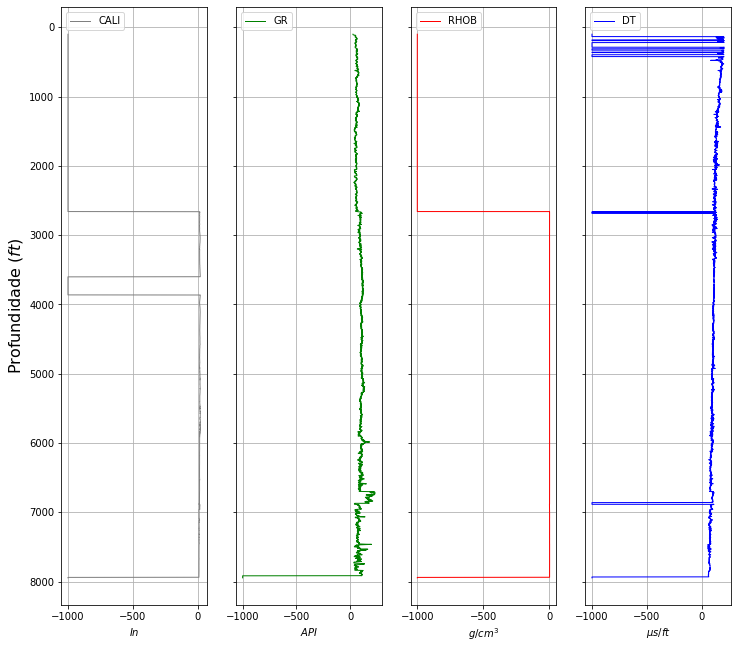

In [5]:
## Visualizando o dado de poço desejado

meu_grafico = {
    'profundidade':{'perfil':'DEPT','descricao':'Profundidade ($ft$)'},
    2:{'perfis':['RHOB'],'cores':['r'],'estilo':['-'],'unidade':'$g / cm^3$'},
    3:{'perfis':['DT'],'cores':['b'],'estilo':['-'],'unidade':'$ \mu s / ft$'},
    0:{'perfis':['CALI'],'cores':['grey'],'estilo':['-'],'unidade':'$In$'},
    1:{'perfis':['GR'],'cores':['g'],'estilo':['-'],'unidade':'$ API $'},
}

grafico_automatico(meu_grafico, poco)

12.9617


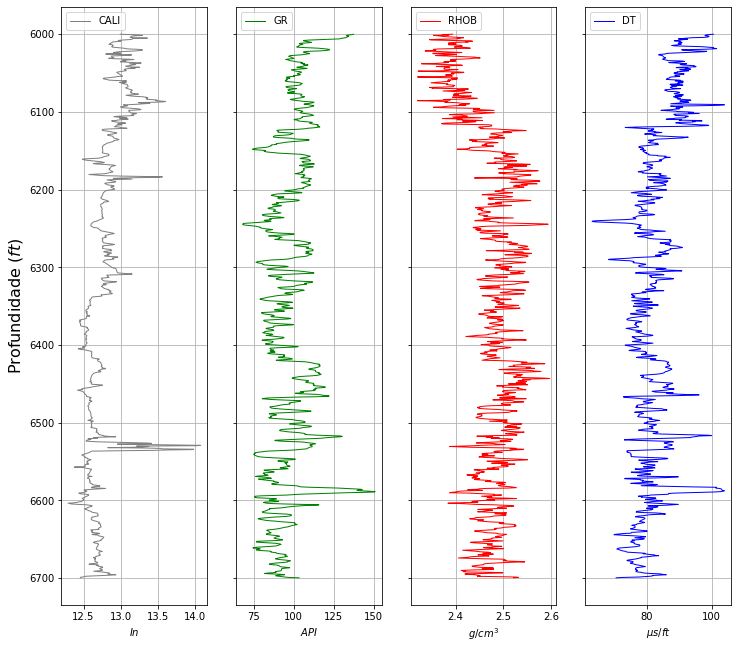

In [6]:
## Escolhendo o intervalo de profundidade

def cropar_dados(dados, mnemonico_profundidade, profundidades):
    """
    Considerando a variável "dados" na forma de dicionário, esta função retorna o dado somente no intervalo de profundidade desejado
    """
    dado_cropado = {}
    w = (dados[mnemonico_profundidade] >= profundidades[0]) & (dados[mnemonico_profundidade] < profundidades[1])

    for i in dados.keys():
        dado_cropado[i] = dados[i][w]

    return dado_cropado

poco_cropado = cropar_dados(poco,'DEPT',(6000,6700)) # 4000 a 7000 # 6000,6700

# ---------------------------------------------------------------------------- #
print(poco_cropado['CALI'][100])

grafico_automatico(meu_grafico, poco_cropado)

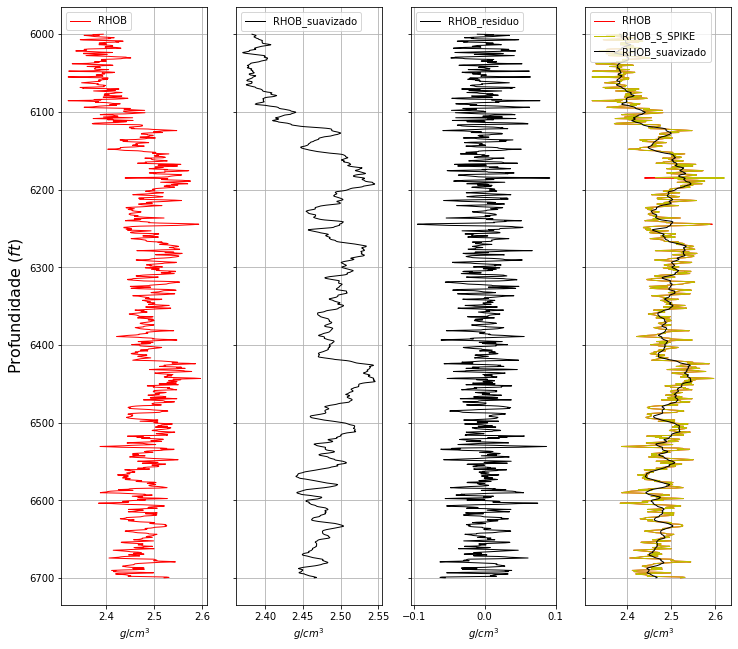

In [7]:
## Removendo os spikes (densidade)

def media_movel(curva,intervalo=100):
    d = list(curva)
    n = len(curva)

    intervalo = round(intervalo/2.0)

    JM = np.zeros(n)
    for j in range(n):
        md = []
        for i in range(j-intervalo,j+intervalo):
            if i < 0:
                i = j-i
            if i >= n-1:
                i = j-i
            md.append(d[i])
        JM[j] = np.mean(md)
    return JM

def remover_spikes(curva, curva_suavizada, limite):

    n = len(curva)
    curva_sem_spikes = np.zeros(n)
    for i in range(n):
        if abs(curva[i] - curva_suavizada[i]) >= limite:
            curva_sem_spikes[i] = curva_suavizada[i] + limite
        else:
            curva_sem_spikes[i] = curva[i]

    return curva_sem_spikes

# ===================================== #

janela = 20
poco_cropado['RHOB_suavizado'] = media_movel(poco_cropado['RHOB'],janela)
poco_cropado['RHOB_residuo'] = poco_cropado['RHOB_suavizado']  - poco_cropado['RHOB']

poco_cropado['RHOB_S_SPIKE'] = remover_spikes(poco_cropado['RHOB'], poco_cropado['RHOB_suavizado'], limite = 0.09)

meu_grafico_1 = {
    'profundidade':{'perfil':'DEPT','descricao':'Profundidade ($ft$)'},
    0:{'perfis':['RHOB'],'cores':['r'],'estilo':['-'],'unidade':'$g / cm^3$'},
    1:{'perfis':['RHOB_suavizado'],'cores':['k'],'estilo':['-'],'unidade':'$g / cm^3$'},
    2:{'perfis':['RHOB_residuo'],'cores':['k'],'estilo':['-'],'unidade':'$g / cm^3$'},
    3:{'perfis':['RHOB','RHOB_S_SPIKE','RHOB_suavizado'],'cores':['r','y','k'],'estilo':['-','-','-'],'unidade':'$g / cm^3$'},
}

grafico_automatico(meu_grafico_1, poco_cropado)

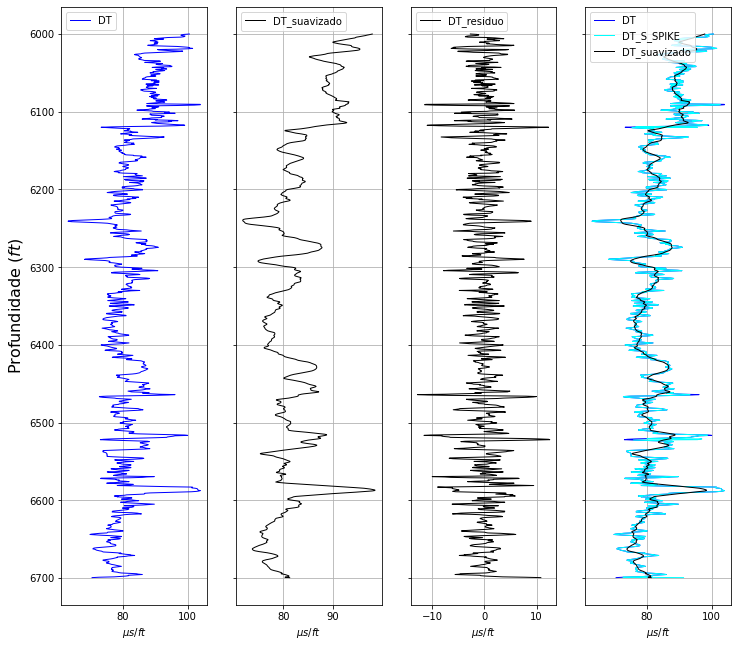

In [8]:
## Removendo os spikes (sônico)

janela = 20
poco_cropado['DT_suavizado'] = media_movel(poco_cropado['DT'],janela)
poco_cropado['DT_residuo'] = poco_cropado['DT_suavizado']  - poco_cropado['DT']

poco_cropado['DT_S_SPIKE'] = remover_spikes(poco_cropado['DT'], poco_cropado['DT_suavizado'], limite = 10)

meu_grafico_2 = {
    'profundidade':{'perfil':'DEPT','descricao':'Profundidade ($ft$)'},
    0:{'perfis':['DT'],'cores':['b'],'estilo':['-'],'unidade':'$ \mu s / ft$'},
    1:{'perfis':['DT_suavizado'],'cores':['k'],'estilo':['-'],'unidade':'$ \mu s / ft$'},
    2:{'perfis':['DT_residuo'],'cores':['k'],'estilo':['-'],'unidade':'$ \mu s / ft$'},
    3:{'perfis':['DT','DT_S_SPIKE','DT_suavizado'],'cores':['b','cyan','k'],'estilo':['-','-','-'],'unidade':'$ \mu s / ft$'},
}

grafico_automatico(meu_grafico_2, poco_cropado)

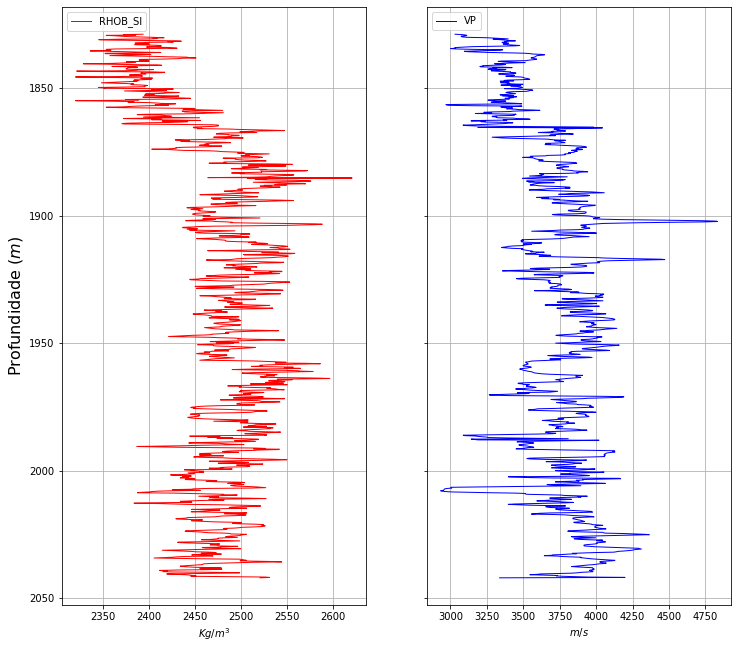

In [9]:
## Ajustes e conversões (pré processamento)

def ft_para_m(item_em_pe):
    "converte de pé pra metro"

    return item_em_pe / 3.28084

# conrverter vagarosidade para velocidade ( us/ft -> m/s)
def dt_vp(dt):
    return 304800 / dt

# ===================================== #

poco_cropado['DEPT_SI'] = ft_para_m(poco_cropado['DEPT'])
poco_cropado['RHOB_SI'] = poco_cropado['RHOB_S_SPIKE']*1000.0 # RHOB S.I. g/cm3 -> Kg/m3
poco_cropado['VP'] = dt_vp(poco_cropado['DT_S_SPIKE']) # VP S.I.

# ---------------------------------------------------------------------------- #

meu_grafico_1 = {
    'profundidade':{'perfil':'DEPT_SI','descricao':'Profundidade ($m$)'},
    0:{'perfis':['RHOB_SI'],'cores':['r'],'estilo':['-'],'unidade':'$Kg / m^3$'},
    1:{'perfis':['VP'],'cores':['b'],'estilo':['-'],'unidade':'$ m / s $'},
}

grafico_automatico(meu_grafico_1, poco_cropado)

OBS: Veja mais sobre o cálculo de VS em [GIECAR - MSPR 04 Estimativa Vs Parte A](https://www.youtube.com/watch?v=nrQpfVmTWm0&list=PL-QDjrxb17QNBRUUR3_xU1XI28Ts8QGlK&index=7)

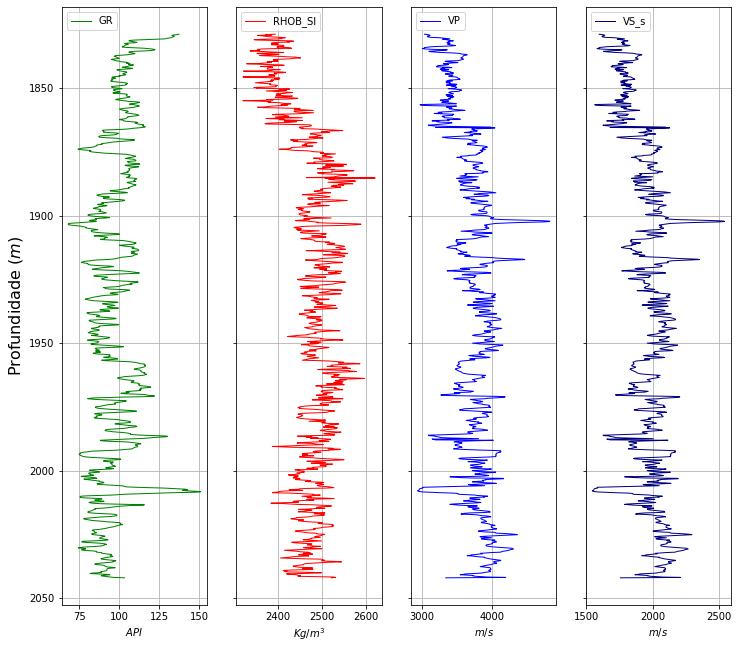

In [10]:
# Cálculo de VSH - Veja mais no documento 

#IGR = (poco_cropado['GR'] - np.min(poco_cropado['GR']))/(np.max(poco_cropado['GR']) - np.min(poco_cropado['GR']) )
#poco_cropado['VSH'] = 0.083*( (2**(3.7 * IGR)) - 1 )

#poco_cropado['VS_s'] = ((3.39) - 4.73*(poco_cropado['NPHI']/100.0) - (1.81*poco_cropado['VSH']))*1000 # Han S.I.
poco_cropado['VS_s'] = poco_cropado['VP']/1.9 # Picket
#poco_cropado['VS_s'] = (0.7936*poco_cropado['VP']) - 0.7868 # 


meu_grafico_2 = {
    'profundidade':{'perfil':'DEPT_SI','descricao':'Profundidade ($m$)'},
    0:{'perfis':['GR'],'cores':['g'],'estilo':['-'],'unidade':'$ API $'},
    1:{'perfis':['RHOB_SI'],'cores':['r'],'estilo':['-'],'unidade':'$Kg / m^3$'},
    2:{'perfis':['VP'],'cores':['b'],'estilo':['-'],'unidade':'$ m / s $'},
    3:{'perfis':['VS_s'],'cores':['navy'],'estilo':['-'],'unidade':'$ m / s $'},
}

grafico_automatico(meu_grafico_2, poco_cropado)


## Zoeppritz (1919) Incidência normal

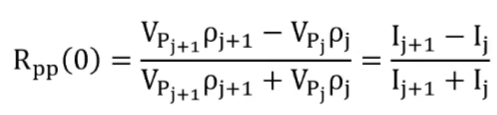

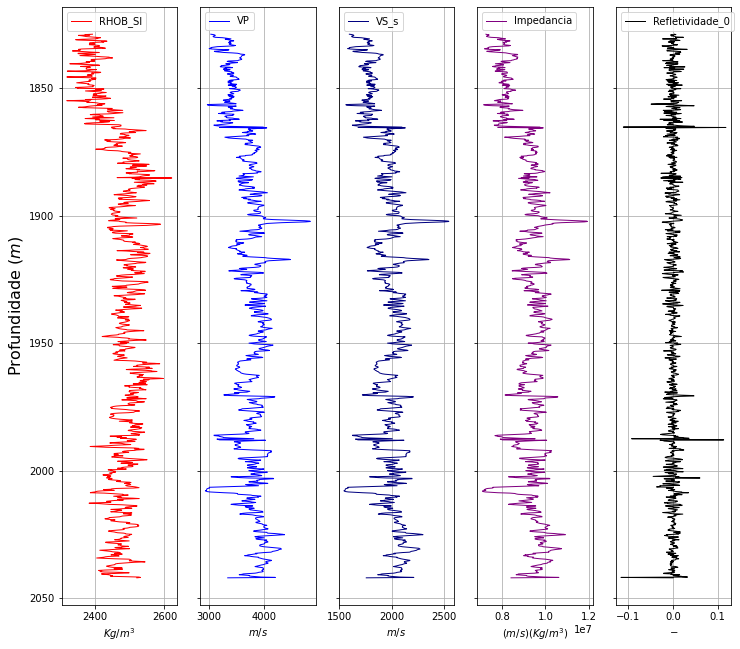

In [11]:
def contraste(curva,val = 2.0):
    n = len(curva)
    contraste_curva = np.zeros(n)

    for i in range(n-1):
        contraste_curva[i] = val*((curva[i+1] - curva[i])/(curva[i+1] + curva[i]))

    return contraste_curva

# ---------------------------------------------------------------------------- #

poco_cropado['Impedancia'] = poco_cropado['VP']*poco_cropado['RHOB_SI']
poco_cropado['Refletividade_0'] = contraste(poco_cropado['Impedancia'],val = 1.0)

meu_grafico_3 = {
    'profundidade':{'perfil':'DEPT_SI','descricao':'Profundidade ($m$)'},
    0:{'perfis':['RHOB_SI'],'cores':['r'],'estilo':['-'],'unidade':'$Kg / m^3$'},
    1:{'perfis':['VP'],'cores':['b'],'estilo':['-'],'unidade':'$ m / s $'},
    2:{'perfis':['VS_s'],'cores':['navy'],'estilo':['-'],'unidade':'$ m / s $'},
    3:{'perfis':['Impedancia'],'cores':['purple'],'estilo':['-'],'unidade':'$ (m / s)(Kg / m^3) $'},
    4:{'perfis':['Refletividade_0'],'cores':['black'],'estilo':['-'],'unidade':'$ - $'},
}

grafico_automatico(meu_grafico_3, poco_cropado)

## Aproximação para a relação de Zoeppritz por Aki & Richards (1980)

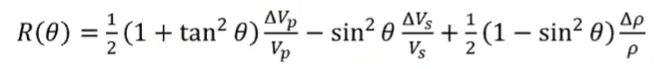

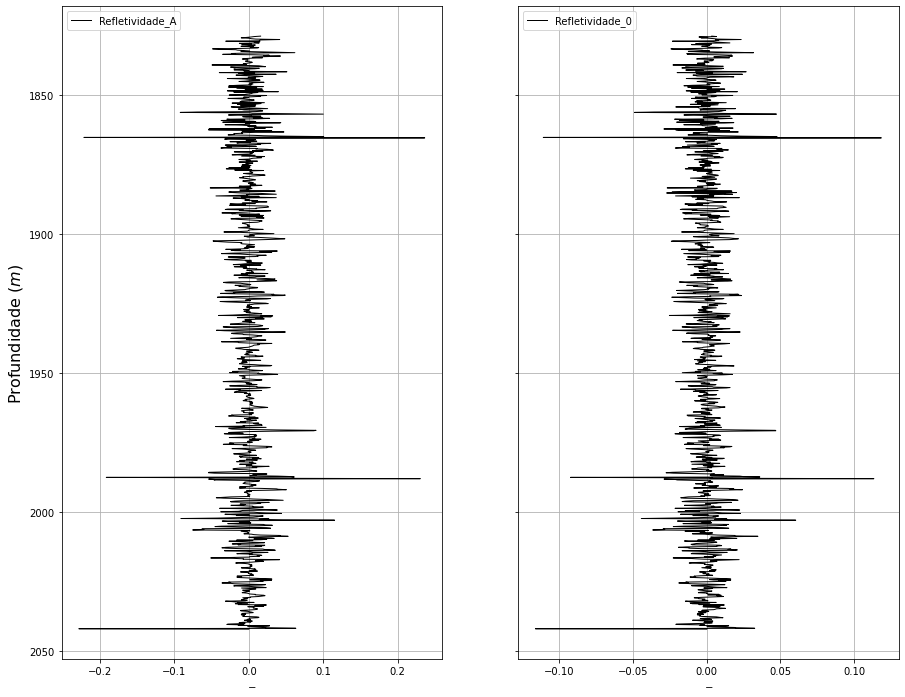

In [12]:
# NOTA: 

def Zoeppritz_aki_richards_2(angulo_incidencia,VP,RHO,VS):

    angulo_incidencia = np.radians(angulo_incidencia)

    n = len(VP)

    CT_VP = contraste(VP) # Equação Contraste que é apresentada acima
    CT_VS = contraste(VS)
    CT_RHO = contraste(RHO)

    termo_0 = 0.5*(1.0 + (np.tan(angulo_incidencia)**2) )*CT_VP #(DVP/VP)
    termo_1 = (np.sin(angulo_incidencia)**2)*CT_VS #(DVS/VS)
    termo_2 = 0.5*(1.0 - np.sin(angulo_incidencia)**2)*CT_RHO #(DRHO/RHO))

    return termo_0 - termo_1 + termo_2

# ---------------------------------------------------------------------------- #

poco_cropado['Refletividade_A'] = Zoeppritz_aki_richards_2(0,poco_cropado['VP'],poco_cropado['VS_s'],poco_cropado['RHOB_SI'])

meu_grafico_4 = {
    'profundidade':{'perfil':'DEPT_SI','descricao':'Profundidade ($m$)'},
    0:{'perfis':['Refletividade_A'],'cores':['k'],'estilo':['-'],'unidade':'$ - $'},
    1:{'perfis':['Refletividade_0'],'cores':['k'],'estilo':['-'],'unidade':'$ - $'},
}

grafico_automatico(meu_grafico_4, poco_cropado,tamanho = [15,12])

## Exercício:

Compare as refletividades (incidência normal) com as refletividades de ângulo de ...
<br>a) ... incidência 1°  
b) ... incidência 10°
<br>c) ... incidência 45°    

In [13]:
#fig, ax = plt.subplots(figsize=(10, 3), dpi=100)

#ax1 = plt.subplot(131)
#im = ax1.plot(poco_cropado['Refletividade_00'],poco_cropado['Refletividade_01'],'.',c='k',alpha=0.1)
#plt.xlabel('0° por 1°')
#plt.grid()

#ax2 = plt.subplot(132)
#im = ax2.plot(poco_cropado['Refletividade_00'],poco_cropado['Refletividade_20'],'.',c='k',alpha=0.1)
#plt.xlabel('0° por 10°')
#plt.grid()

#ax3 = plt.subplot(133)
#im = ax3.plot(poco_cropado['Refletividade_00'],poco_cropado['Refletividade_45'],'.',c='k',alpha=0.1)
#plt.xlabel('0° por 45°')
#plt.grid()

# =================================================== #

#fig.tight_layout()
#fig.subplots_adjust(right=0.825)
#plt.show()

## Calculo da Relação tempo x Profundidade

0.15239999512323266
0.15239999512300528
0.15239999512323266
0.15239999512300528


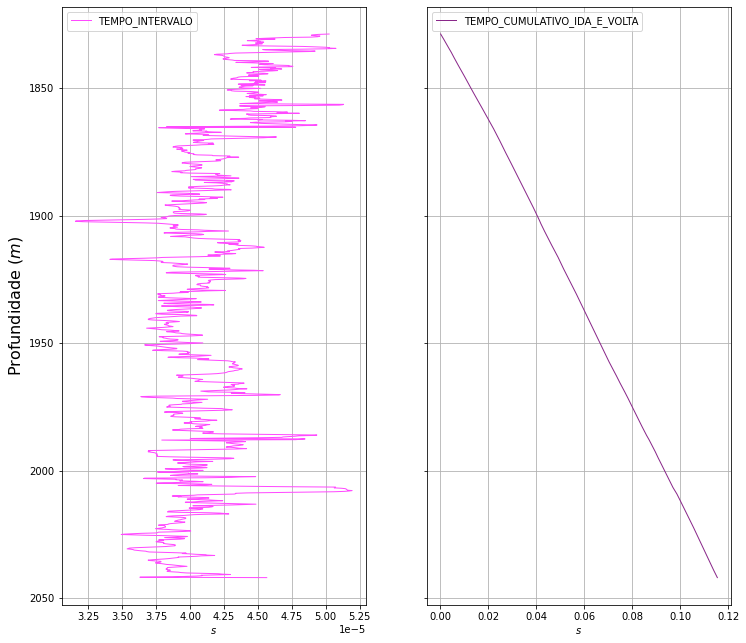

In [14]:
print(poco_cropado['DEPT_SI'][1] - poco_cropado['DEPT_SI'][0])
print(poco_cropado['DEPT_SI'][2] - poco_cropado['DEPT_SI'][1])
print(poco_cropado['DEPT_SI'][3] - poco_cropado['DEPT_SI'][2])
print(poco_cropado['DEPT_SI'][135] - poco_cropado['DEPT_SI'][134])

# intervalo constante de profundidade em metros (m)
profundidade_intervalo = np.round(poco_cropado['DEPT_SI'][1] - poco_cropado['DEPT_SI'][0],4)

poco_cropado['TEMPO_INTERVALO'] = profundidade_intervalo/poco_cropado['VP']

poco_cropado['TEMPO_CUMULATIVO_IDA_E_VOLTA'] = 2 * np.cumsum(poco_cropado['TEMPO_INTERVALO'])

meu_grafico_5 = {
    'profundidade':{'perfil':'DEPT_SI','descricao':'Profundidade ($m$)'},
    0:{'perfis':['TEMPO_INTERVALO'],'cores':['#ff4aff'],'estilo':['-'],'unidade':'$ s $'},
    1:{'perfis':['TEMPO_CUMULATIVO_IDA_E_VOLTA'],'cores':['#8a288a'],'estilo':['-'],'unidade':'$ s $'},
}

grafico_automatico(meu_grafico_5, poco_cropado)

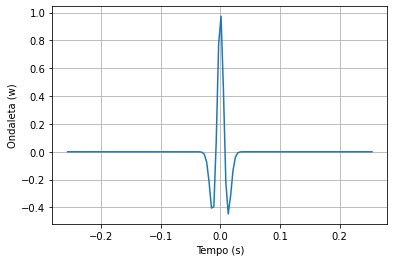

In [15]:
# Definindo a ondaleta (wavlet)

def ricker(f, length, dt, A = 1.0):
    t = np.linspace(-length / 2, (length-dt) / 2, int(length / dt))
    y = A*(1. - 2.*(np.pi**2)*(f**2)*(t**2))*np.exp(-(np.pi**2)*(f**2)*(t**2))
    return t, y

tw, w = ricker (f=30, length = 0.512, dt = 0.004)

plt.plot(tw,w)
plt.xlabel('Tempo (s)')
plt.ylabel('Ondaleta (w)')
plt.grid()
plt.show()

## Exercício:

a) Abaixo é feita a convolução da Ondaleta (Wavlet) pela refletividade. Compare na figura abaixo o Sismograma sintético (incidência normal) com o sismograma sintético (com ângulo - Zoeppritz por Aki & Richards (1980)).
<br>
<br>b) Mude também a frequência da ondaleta para ver o que acontece.

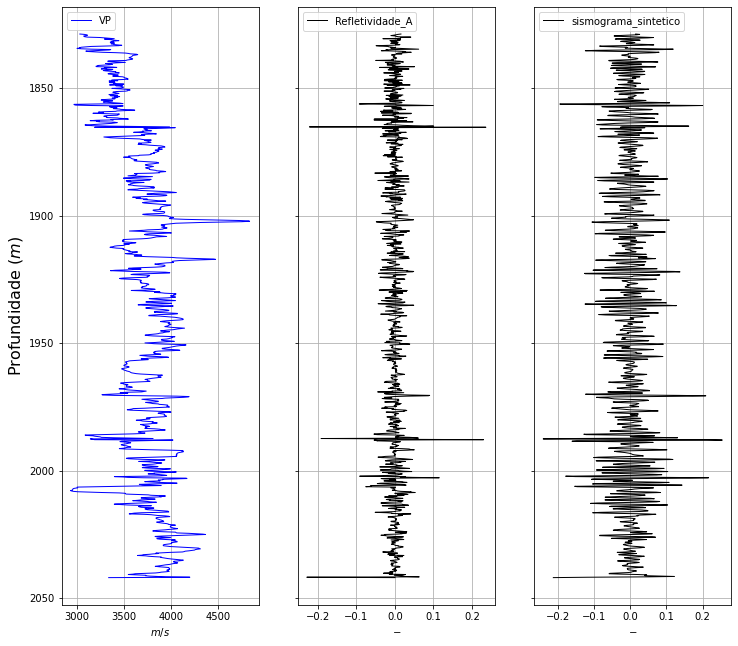

In [16]:
# Convolução para o sismograma sintético

poco_cropado['sismograma_sintetico'] = np.convolve(w, poco_cropado['Refletividade_A'], mode='same')
poco_cropado['sismograma_sintetico_0'] = np.convolve(w, poco_cropado['Refletividade_0'], mode='same')

poco_cropado['VP']

meu_grafico_6 = {
    'profundidade':{'perfil':'DEPT_SI','descricao':'Profundidade ($m$)'},
    0:{'perfis':['VP'],'cores':['blue'],'estilo':['-'],'unidade':'$ m / s $'},
    1:{'perfis':['Refletividade_A'],'cores':['k'],'estilo':['-'],'unidade':'$ - $'},
    2:{'perfis':['sismograma_sintetico'],'cores':['k'],'estilo':['-'],'unidade':'$ - $'},
}

grafico_automatico(meu_grafico_6, poco_cropado)

# Exercícios Finais:

### 1 - Mude a equaçao para o cálculo de VS (láaaaaaaa em cima) e refaça os passos. Quais as diferenças você observou? Tiveram diferenças? 

### 2 - O código abaixo mostra como interpolar o perfil de profundidades (DEPT) para o intervalo de tempo desejado. Faça o mesmo para VP, VS e $\rho$ e depois reproduza toda a sequência até o sismograma sintético (copy - paste violento)

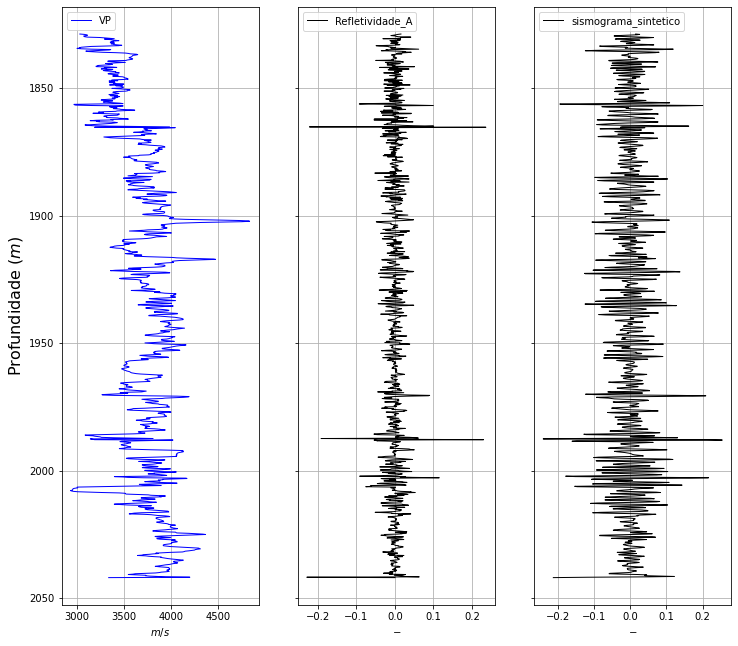

In [18]:
# Agora com o tempo regular e a profundidade em função do tempo

dt = 0.004

tempo_maximo = max(poco_cropado['TEMPO_CUMULATIVO_IDA_E_VOLTA'])

poco_cropado['novo_tempo'] = np.arange(0, tempo_maximo, dt)

poco_cropado['DEPT_SI_tempo'] = np.interp(x = poco_cropado['novo_tempo'], xp = poco_cropado['TEMPO_CUMULATIVO_IDA_E_VOLTA'], fp = poco_cropado['DEPT_SI'])

meu_grafico_7 = {
    'profundidade':{'perfil':'DEPT_SI_tempo','descricao':'Profundidade ($m$)'},
    0:{'perfis':['DEPT_SI_tempo'],'cores':['grey'],'estilo':['-'],'unidade':'$ m $'},
    1:{'perfis':['novo_tempo'],'cores':['k'],'estilo':['-'],'unidade':'$ - $'},
}

grafico_automatico(meu_grafico_6, poco_cropado)